We will use kNN to predict the type of Breast Cancer in the Breast Cancer Wisconsin(Diagnostic)Data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
bcData = pd.read_csv('C://Users/syeda/Downloads/wisc_bc_data.csv')

In [3]:
bcData.shape

(569, 32)

In [4]:
bcData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [5]:
bcData.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [6]:
bcData['diagnosis'] = bcData.diagnosis.astype('category')

In [7]:
bcData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [8]:
bcData.groupby(by=['diagnosis']).count()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357
M,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212


In [9]:
bcData.drop(axis=1,labels='id',inplace=True)

In [10]:
X = bcData.drop(axis=1,labels='diagnosis')
y = bcData['diagnosis']

In [11]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always advised to scale numeric attributes in models that calculate distances.

XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

In [12]:
X_train,X_test,y_train,y_test = train_test_split(XScaled,y,test_size=0.30,random_state=1)

### Build KNN model

In [13]:
KNN = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [14]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(weights='distance')

In [15]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = KNN.predict(X_test)
KNN.score(X_test, y_test)

0.9649122807017544

In [16]:
from sklearn import metrics

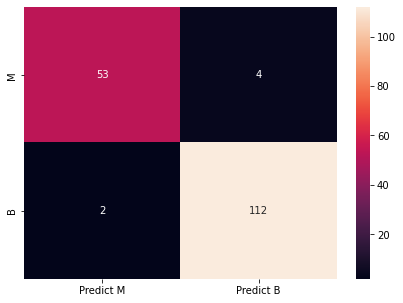

In [17]:
cm = metrics.confusion_matrix(y_test,predicted_labels,labels=['M','B'])

df = pd.DataFrame(cm, index=[i for i in ['M','B']], columns=[i for i in ['Predict M','Predict B']])

plt.figure(figsize=(7,5))
sns.heatmap(df,annot=True,fmt='g')
plt.show()

## Choosing the K-Value
- Choosing the right k is not easy and is subjective. Usually an odd number is choosen.
- A small k captures too much training noise and hence does not do well in test data. 
- A very large k does so much smoothening that it does not manage to capture information in the training data sufficiently - and hence does not do well in test data.
- If the number of classes is 2, many suggest a rule of thumb approach(set k=sqrt(n)), that might not be the best but does well mostly.¶

In [18]:
scores = []
for k in range(1,50):
    KNN = KNeighborsClassifier(n_neighbors=k,weights='distance')
    KNN.fit(X_train,y_train)
    scores.append(KNN.score(X_test,y_test))

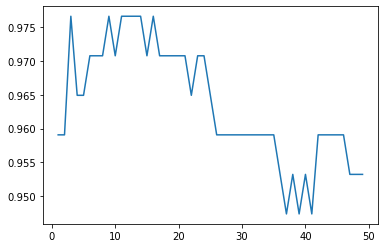

In [19]:
plt.plot(range(1,50),scores)
plt.show()